# Classifying Heart Disease
## Logistic Regression Project

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
heart_data = pd.read_csv('heart_disease.csv')

In [7]:
heart_data.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

The present column is our binary outcome of interest. 0 encodes the absence of any heart disease, while 1 encodes the presence.

Note: the original dataset actually has a multiclass version of the problem, based on heart disease severity. We've reduced it to a binary case for simplicity.

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [5]:
heart_data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [23]:
heart_data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Exploring the outcome variable

<Axes: >

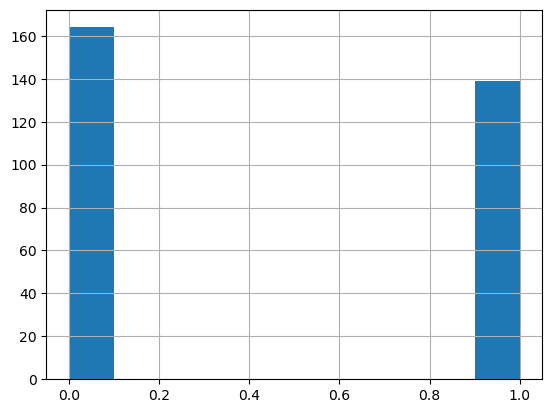

In [8]:
heart_data['present'].hist()

We see there is an almost equal amount of heart disease sufferers and non-sufferers

In [44]:
heart_data[heart_data.eq("?").any(axis=1)]

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
87,88,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
166,167,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,193,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
266,267,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,1
287,288,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,303,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


There are 6 rows with a '?' for either ca or thai, I will remove these from the analysis. 

In [46]:
#drop any rows that have 11 in the rebounds column or 31 in the points column
heart_data = heart_data[(heart_data.ca != '?') & (heart_data.thal != '?')]

In [47]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   age         297 non-null    int64  
 2   sex         297 non-null    int64  
 3   cp          297 non-null    int64  
 4   trestbps    297 non-null    int64  
 5   chol        297 non-null    int64  
 6   fbs         297 non-null    int64  
 7   restecg     297 non-null    int64  
 8   thalach     297 non-null    int64  
 9   exang       297 non-null    int64  
 10  oldpeak     297 non-null    float64
 11  slope       297 non-null    int64  
 12  ca          297 non-null    object 
 13  thal        297 non-null    object 
 14  present     297 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 37.1+ KB


In [51]:
heart_data['ca'] = heart_data['ca'].astype(str).astype(float)
heart_data['thal'] = heart_data['thal'].astype(str).astype(float)

/var/folders/sv/6pzthr9921vblbsgdt4thkdc0000gn/T/ipykernel_2788/3564360427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['ca'] = heart_data['ca'].astype(str).astype(float)
/var/folders/sv/6pzthr9921vblbsgdt4thkdc0000gn/T/ipykernel_2788/3564360427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['thal'] = heart_data['thal'].astype(str).astype(float)


In [52]:
 #Checking potential predictors
heart_data.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean",
        "ca": "mean",
        "thal": "mean"
    }
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
present,,,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem like good candidates for predictors:

1. `age`
2. `thalach` (maximum heart rate achieved)
3. `restecg` (resting ECG)
4. `ca` (number of vessels colored by fluoroscopy)

## Dividing The Data

We'll use a 70-30 split of the dataset for the training and test sets.

In [56]:
y = heart_data['present']
X = heart_data[['age', 'thalach', 'restecg', 'ca']]

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [58]:

# Checking for separation in the datasets
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))
     

Y_train:  109
Y_train:  98
Y_test:  51
Y_test:  39


We confirm above that there are both cases and non-cases in both the training and test sets

## Building the Model

In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [67]:

# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print(f"Training Accuracy: {acc:.2f}")
print(f"Training Sensitivity: {sens:.2f}")
print(f"Training Specificity: {spec:.2f}")
     

Training Accuracy: 0.77
Training Sensitivity: 0.66
Training Specificity: 0.86


Overall model accuracy is 77% meaning the model correctly predicts heart disease 77% percent of the time, 
Sensitivity of the training model is 66%, if the model predicts heart disease, it is right 66% of the time. 
Specificty of the model is 86% meaning predictions of non-presence of heart disease are correct 86% of the time. 
The model performs better for the non-cases.

## Interpreting Model Coefficients

In [68]:

coefs = ["age", "thalach", "restecg", "ca"]

# Checking in terms of log-odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

age : -0.02
thalach : -0.04
restecg : 0.39
ca : 1.18


In [69]:

# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))
     

age : 0.98
thalach : 0.96
restecg : 1.47
ca : 3.25



* Higher age and maximum heart rate (thalach) is associated with lower odds of heart disease holding the other predictors constant, but both of these odds ratios are close to 1.
* Resting ECG and the number of colored vessels are associated with higher odds of heart disease holding the other predictors constant. These increases seem to be moderate and high, respectively (a 47% increase and 225% (!) increase).

## Final Model Evaluation

In [71]:

# Checking the various metrics for the model (test set)
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print(f"Training Accuracy: {acc:.2f}")
print(f"Training Sensitivity: {sens:.2f}")
print(f"Training Specificity: {spec:.2f}")

Training Accuracy: 0.76
Training Sensitivity: 0.79
Training Specificity: 0.73


Test accuracy was 76%, sensitivity was 79%, and specificity was 73%. Compared to the training set, the accuracy didn't change much, while the model fared better with cases and worse with non-cases. This is potentially useful since this application is health-based. We might be more interested in being better at identifying cases than non-cases.